### Step 1: Make Necessary Imports


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

#Lux - EDA package
import lux

from sklearn.preprocessing import MinMaxScaler

In [2]:
import lux

In [3]:
os.getcwd()

'C:\\Users\\HP\\0DS Learnbay'

### Step 2: load the dataset

In [4]:
df = pd.read_csv('parkinsons.data')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [5]:
lux.debug_info()

AttributeError: module 'lux' has no attribute 'debug_info'

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.tail()

### finding null values in the dataset

In [ ]:
df.isnull().sum()

In [ ]:
df.dtypes

In [ ]:
df['status'].value_counts()

In [ ]:
# finding the unique values from the datset

for i in df.columns:
    print('************************************', i, 
         '**************************************')
    print(set(df[i].tolist()))
    print()

In [ ]:
temp = df['status'].value_counts()
temp_df = pd.DataFrame({'status': temp.index, 'values':temp.values})
print(sns.barplot(x= 'status', y = 'values', data = temp_df))

### finding the distribution of the data

In [ ]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.columns)[1:]:
    distplots(i)

In [ ]:
def boxplots(col):
    sns.boxplot(x =df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude = ['object']))[1:]:
    boxplots(i)

## ADVANCED EDA PACKAGE - dtale
### pip install dtale

In [6]:
import dtale
import dtale.app as dtale_app

In [12]:
df2 = pd.DataFrame(df, columns = df.columns)
dtale.show(df2)

In [15]:
## PANDAS PROFILING
# pip install pandas-profiling
import ydata_profiling 
prof = ydata_profiling.ProfileReport(df2, title = 'Report')
prof.to_file(output_file = 'output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
df2.duplicated().sum()

0

### Splitting data into independent and dependent variables

In [63]:
x = df.drop(['name', 'status'], axis = 1)
y = df[['status']].astype(int)

In [64]:
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [65]:
y.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [66]:
x.dtypes

MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


### Imbalance treatment required : Oversampling/ SMOTE

In [23]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

In [67]:
x_ros, y_ros = ros.fit_resample(x,y)

In [68]:
pd.DataFrame(y_ros).value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [69]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


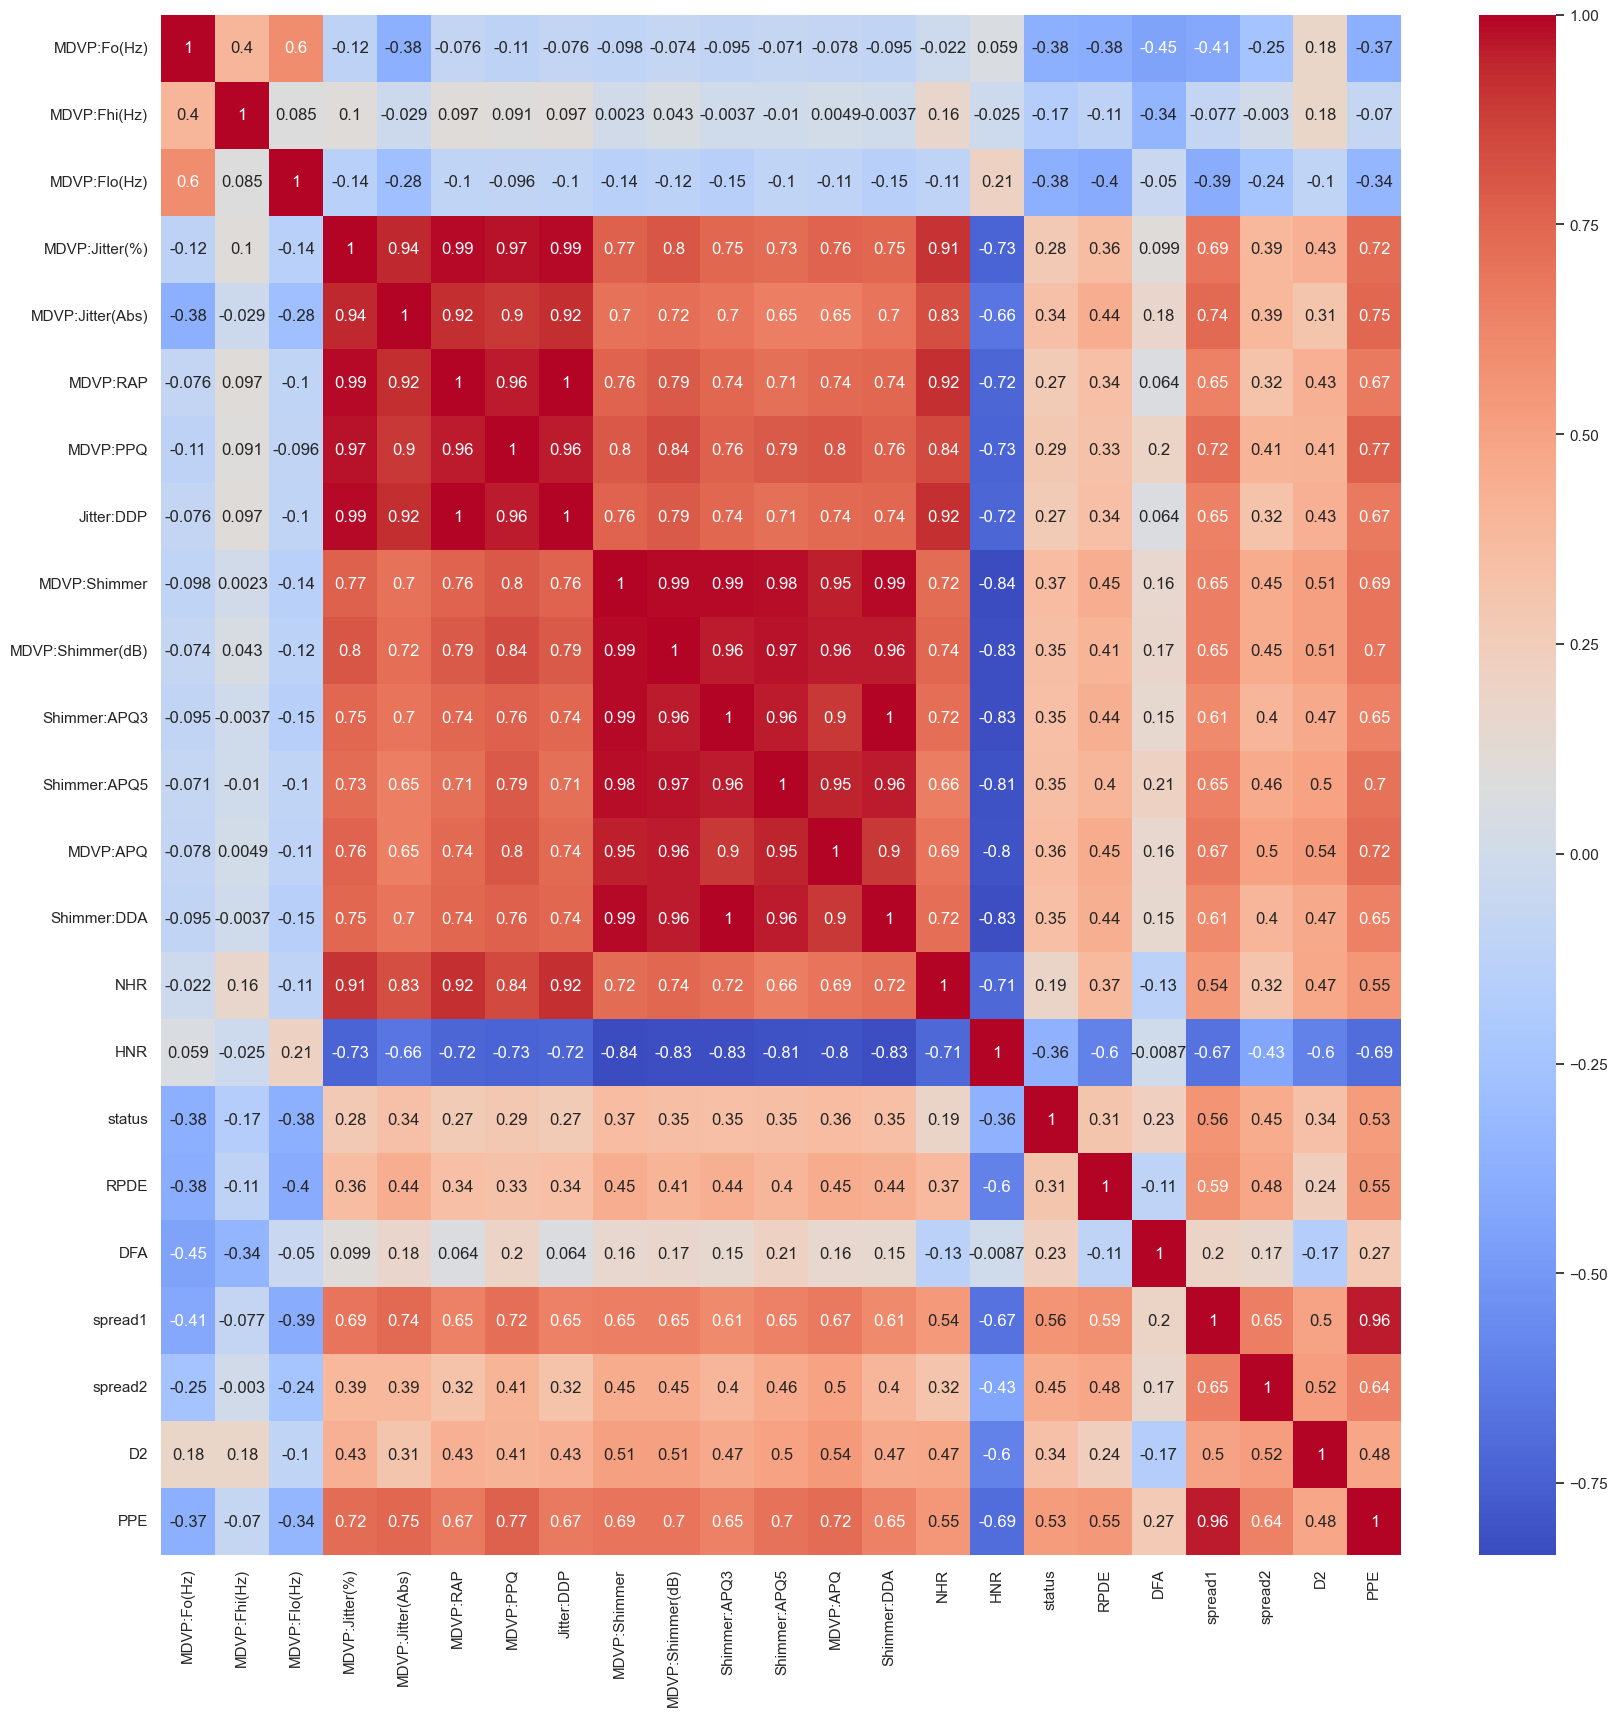

In [72]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'coolwarm')
plt.show()

### Feature Scaling

In [74]:
sc = MinMaxScaler((-1, 1))
x1 = sc.fit_transform(x_ros)
y1 = y_ros

In [75]:
pd.DataFrame(x1).shape

(294, 22)

In [82]:
len(y1)

294

### PRINCIPAL COMPONENT ANALYSIS - DIMENSION REDUCTION

In [76]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
x_pca = pca.fit_transform(x1)

print(pd.DataFrame(x1).shape)
print(x_pca.shape)

(294, 22)
(294, 8)


### SPLITTING DATA INTO TRAINING AND TESTING SETS

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y1, test_size =0.2, random_state =101)

In [93]:
###  RANDOM FOREST CLASSIFIER
y1.shape

(294,)

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'gini', random_state = 4)

In [102]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=4)

In [103]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [104]:
# EVALUATE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [106]:
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))

[[114   0]
 [  0 121]]

[[33  0]
 [ 3 23]]


In [107]:
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       121

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.88      0.94        26

    accuracy                           0.95        59
   macro avg       0.96      0.94      0.95        59
weighted avg       0.95      0.95      0.95        59



In [108]:
print(accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

1.0

0.9491525423728814


In [ ]:
#OVERFITTING?? check using cross validation always especially in case of RF

### CROSS_VALIDATION METHOD

In [110]:
from sklearn.model_selection import cross_val_score
train_acc = cross_val_score(rf, x_train, y_train, cv = 10)
test_acc = cross_val_score(rf, x_test, y_test, cv =10)

print(train_acc)
print('Train Mean Accuracy ', train_acc.mean())
print('**********************************')
print(test_acc)
print('Test Mean Accuracy ', test_acc.mean())
print('**********************************')

[1.         1.         0.95833333 0.91666667 0.95833333 1.
 0.95652174 0.91304348 0.95652174 0.95652174]
Train Mean Accuracy  0.9615942028985508
**********************************
[1.         0.83333333 0.66666667 1.         0.83333333 0.83333333
 1.         0.83333333 1.         1.        ]
Test Mean Accuracy  0.9
**********************************


In [ ]:
## NO OVERFITTING.

## XGBoosting

In [111]:
from xgboost import XGBClassifier

In [112]:
xgb = XGBClassifier(random_state = 11)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=11, ...)

In [113]:
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

In [114]:
print(classification_report(y_train, y_pred_train_xgb))
print()
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       121

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.88      0.94        26

    accuracy                           0.95        59
   macro avg       0.96      0.94      0.95        59
weighted avg       0.95      0.95      0.95        59



In [115]:
print(accuracy_score(y_train, y_pred_train_xgb))
print()
print(accuracy_score(y_test, y_pred_test_xgb))

1.0

0.9491525423728814


In [116]:
#from sklearn.model_selection import cross_val_score
train_acc = cross_val_score(xgb, x_train, y_train, cv = 10)
test_acc = cross_val_score(xgb, x_test, y_test, cv =10)

print(train_acc)
print('Train Mean Accuracy ', train_acc.mean())
print('**********************************')
print(test_acc)
print('Test Mean Accuracy ', test_acc.mean())
print('**********************************')

[1.         1.         1.         0.95833333 0.91666667 1.
 0.91304348 1.         1.         1.        ]
Train Mean Accuracy  0.9788043478260869
**********************************
[1.         0.83333333 0.66666667 1.         0.66666667 0.83333333
 1.         0.83333333 1.         1.        ]
Test Mean Accuracy  0.8833333333333334
**********************************


In [ ]:
## HIGH VARIANCE BETWEEN ACCURACIES WHICH SHOW HIGH VARIANCE IE OVERFITTING

### bagging and boosting
- bagging - best model: RF : handles OVERFITTING/HIGH VARIANCE best
- boosting - best model: XGB : handles UNDERFITTING/HIGH BIAS best